# 1st period - Regression

#### Carregar dados (vamos trabalhar com "vinho branco")

In [3]:
import pandas as pd

In [4]:
df_wine = pd.read_csv("dataset/winequality-white.csv", sep=";")

### Análise exploratória

In [5]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_wine.shape

(4898, 12)

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Visualizando a distribuição dos dados para algumas variáveis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

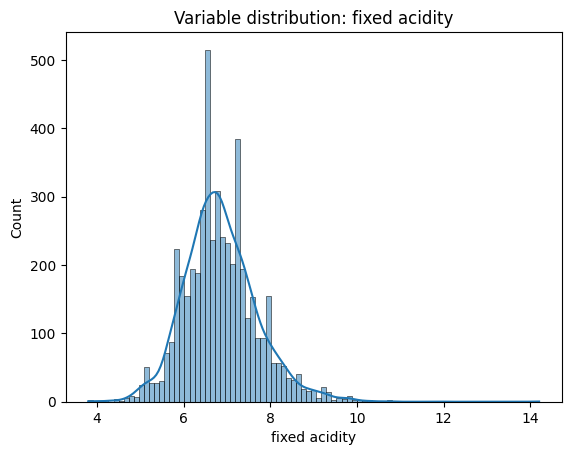

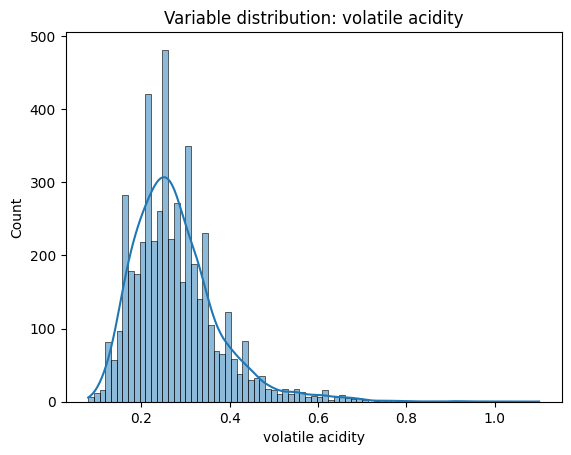

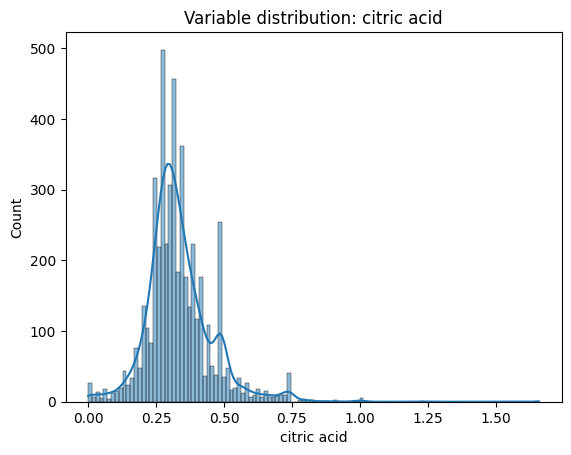

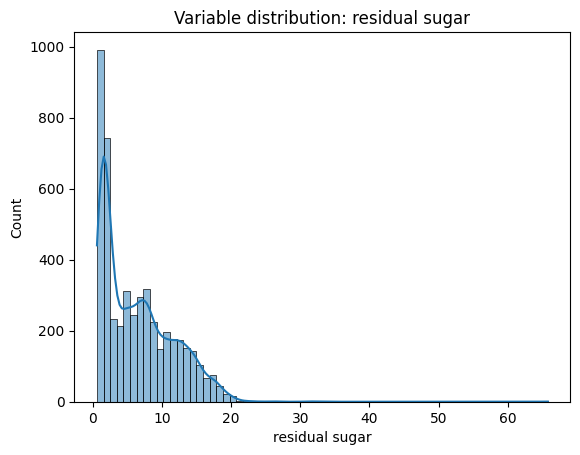

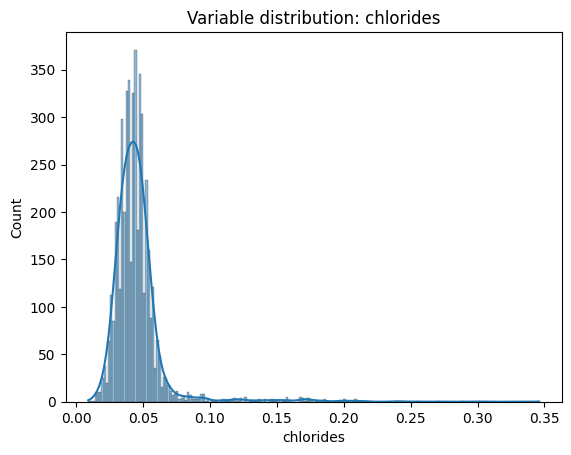

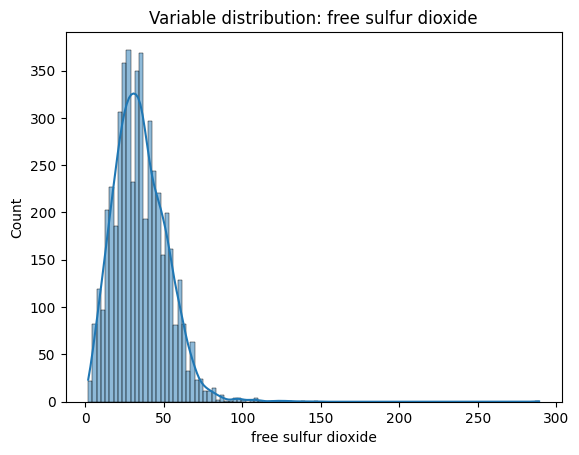

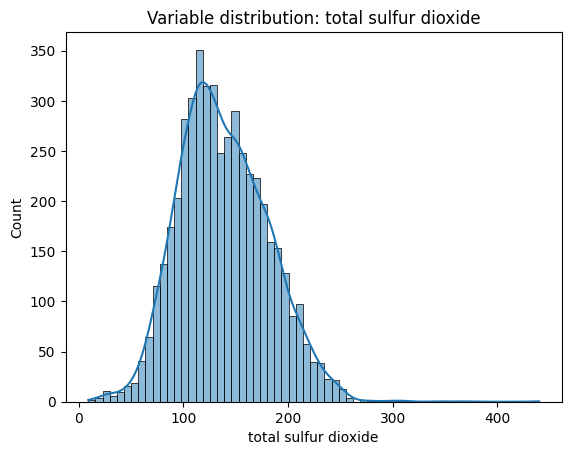

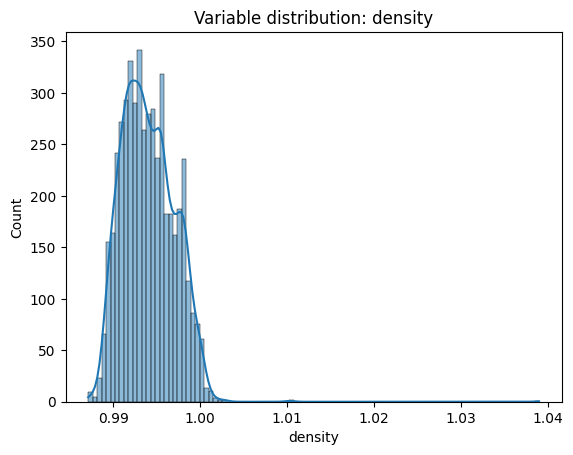

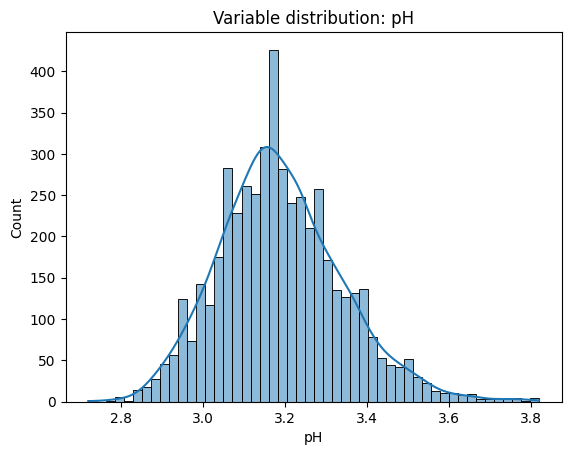

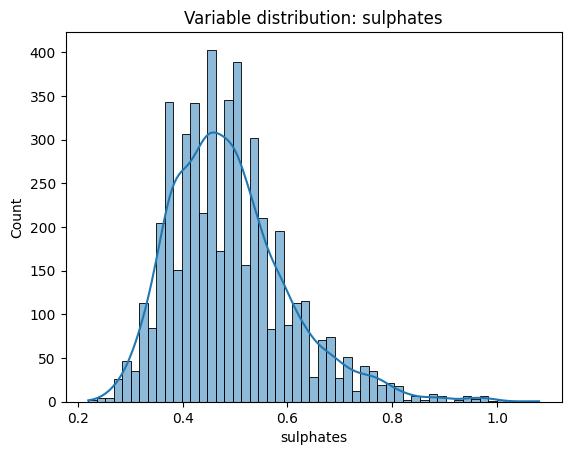

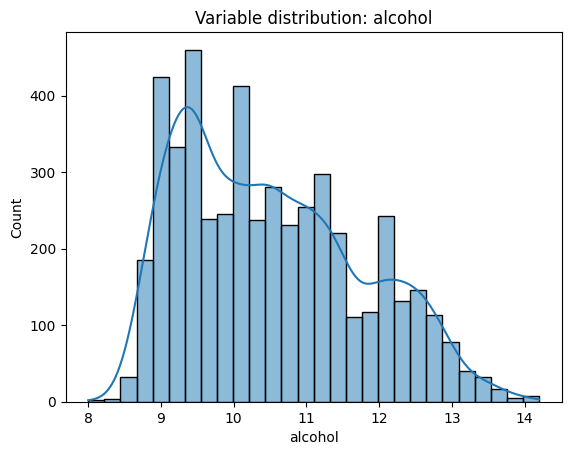

In [11]:
for variable in df_wine.columns.drop('quality'):
    sns.histplot(
        data= df_wine,
        x = variable,
        kde = True
    ).set_title(f"Variable distribution: {variable}")
    plt.show()

#### Treat outliers

In [12]:
import numpy as np

In [13]:
"""
To detect outlies, I'll use Interquartile Range Method.
Therefore, values lower than Q1-1.5*IQR and greater than Q3+1.5*IQR
will be considered outliers.  
"""

outliers_variable_counter = dict()

for variable in df_wine.columns.drop("quality"):
        q1 = np.quantile(df_wine[variable], 0.25)
        q3 = np.quantile(df_wine[variable], 0.75)

        iqr = q3 - q1 
        outliers = df_wine[(df_wine[variable] > q3 + 1.5 * iqr) | (df_wine[variable] < q1 - 1.5 * iqr) ]
        outliers_variable_counter[variable] = outliers.shape[0]

outliers_variable_counter

{'fixed acidity': 119,
 'volatile acidity': 186,
 'citric acid': 270,
 'residual sugar': 7,
 'chlorides': 208,
 'free sulfur dioxide': 50,
 'total sulfur dioxide': 19,
 'density': 5,
 'pH': 75,
 'sulphates': 124,
 'alcohol': 0}

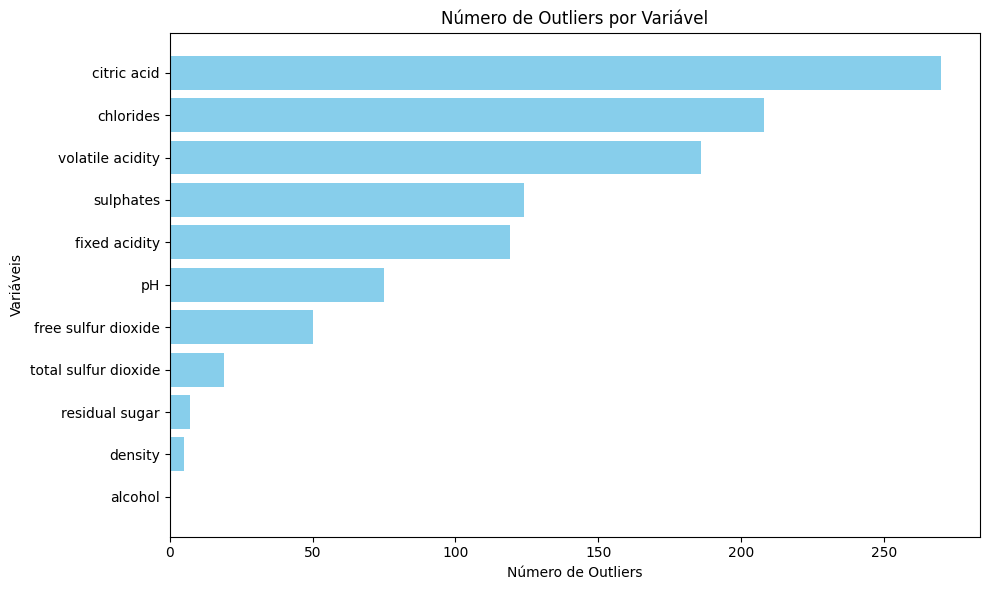

In [14]:
"""
Devido ao número de outliers não ser tão grande, não removeremos esses dados do dataset
"""
sorted_outliers = dict(sorted(outliers_variable_counter.items(), key=lambda item: item[1], reverse=False))

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_outliers.keys()), list(sorted_outliers.values()), color='skyblue')
plt.title('Número de Outliers por Variável')
plt.xlabel('Número de Outliers')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

#### Analisando a qualidade

In [15]:
df_wine["quality"].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [16]:
df_wine["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<Axes: xlabel='quality'>

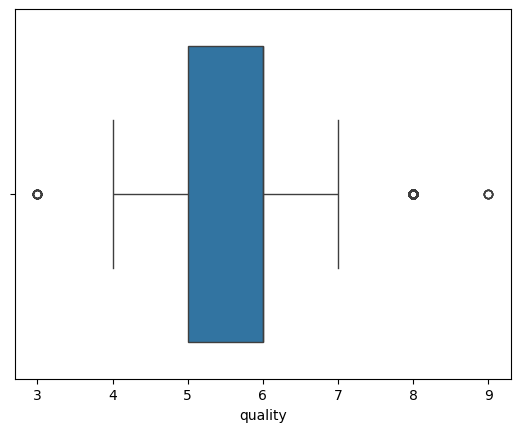

In [17]:
sns.boxplot(data = df_wine, x = "quality")

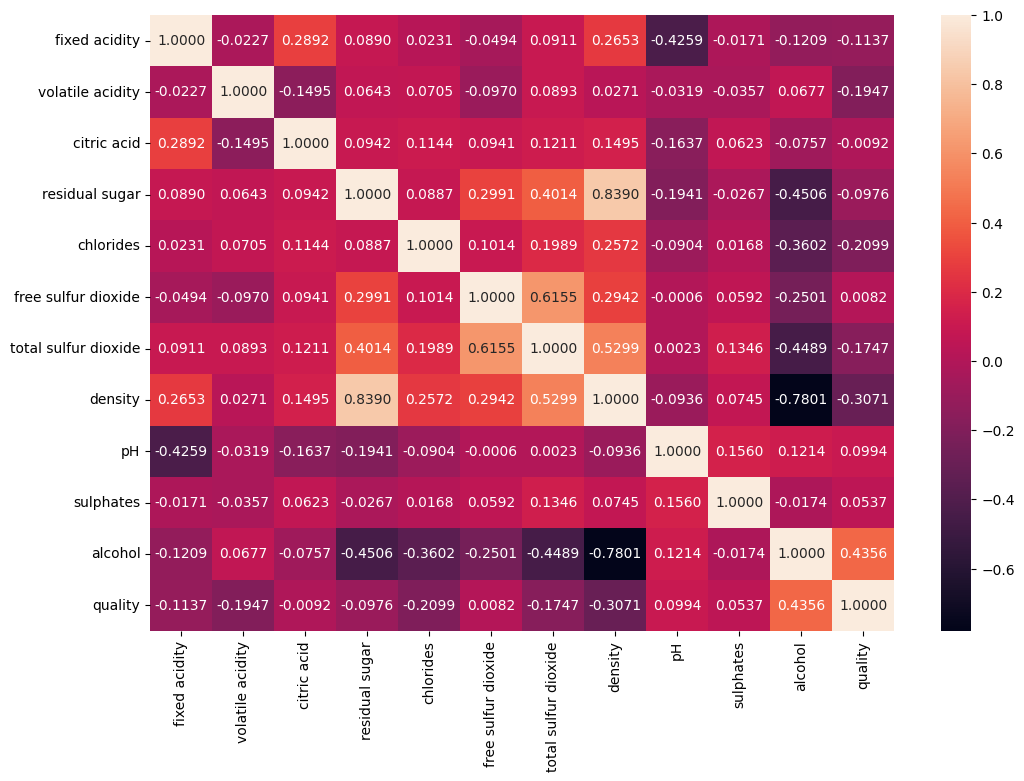

In [18]:
plt.figure(figsize=(12, 8))  
sns.heatmap(df_wine.corr(), annot=True, fmt=".4f")
plt.show()

### Treinando o modelo

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
Y = df_wine["quality"]
X = df_wine.loc[:, df_wine.columns!="quality"]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25)

In [23]:
def rmse(test, predictions):
    rmse_value = np.sqrt(mean_squared_error(test, predictions))
    print(f"Root Mean Squared Error: {rmse_value}")


def predict_and_analise(Regressor):
    regressor = Regressor()
    regressor.fit(X_train, Y_train)

    predicts =  regressor.predict(X_test)
    rmse(Y_test, predicts)



## Linear Regression

In [24]:
predict_and_analise(LinearRegression)

Root Mean Squared Error: 0.7599098027194605


## Random Forest

In [25]:
predict_and_analise(RandomForestRegressor)

Root Mean Squared Error: 0.6212638205254492


## Decision Tree

In [26]:
predict_and_analise(DecisionTreeRegressor)

Root Mean Squared Error: 0.8398250546685182


## Otimization 
### Escolhendo o modelo com menor erro (Random Forest), vamos tentar otimizá-lo

In [27]:
from sklearn.model_selection import GridSearchCV


In [28]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]},
]

regressor = RandomForestRegressor()


grid_search = GridSearchCV(regressor, param_grid, cv= 5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [30]:
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=30)

In [31]:
final_model = grid_search.best_estimator_ 
predictions = final_model.predict(X_test)

rmse(Y_test, predictions)



Root Mean Squared Error: 0.6193969710208072


In [32]:

results_df = pd.DataFrame({'Actual': Y_test, 'Predicted (int)': np.int8(np.round(predictions))})
print(results_df)

      Actual  Predicted (int)
601        6                6
1801       5                5
1272       5                5
4573       6                7
4047       6                6
...      ...              ...
4018       6                6
4693       6                6
4267       7                6
2110       5                5
1555       7                6

[1225 rows x 2 columns]
